In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
device = torch.device('cuda:1')

In [3]:
from utils.test_utils import obtain_AL_ckpts, split_AL_loaders
from utils.test_utils import load_AL_config, load_AL_dataloader, load_test_model

In [4]:
save_dir = '../results/simulation/220226_0814'
config_file, state_list, data_files = obtain_AL_ckpts(save_dir)

unknown file:  train_AL.txt


In [5]:
print(state_list, data_files)

['binaryNN_0.pt', 'binaryNN_1.pt', 'binaryNN_2.pt', 'binaryNN_3.pt', 'binaryNN_4.pt', 'binaryNN_5.pt', 'binaryNN_6.pt', 'binaryNN_7.pt', 'binaryNN_8.pt', 'binaryNN_9.pt'] ['test_loader.pkl', 'final_dataloader.pkl']


### load models and train data loaders

In [6]:
args = load_AL_config(save_dir, config_file)
dl_loader = load_AL_dataloader(args.save_dir,'final_dataloader.pkl')
test_loader = load_AL_dataloader(args.save_dir,'test_loader.pkl')

In [7]:
dl_loaders,dl_cum_loaders = split_AL_loaders(dl_loader, args)

/home/saerom/fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)


In [8]:
from utils.test_utils import test_groupwise, test_model

In [9]:
for it,st in enumerate(state_list):
    print("="*50)
    clf,clf_criterion = load_test_model(save_dir, st, args)
    _, acc = test_model(clf, dl_cum_loaders[it],clf_criterion, device, args.problem_type)
    _, acc2 = test_model(clf, test_loader,clf_criterion, device, args.problem_type)
    print("cumulated total training/test acc:", acc,"/",acc2)
    test_groupwise(clf, dl_cum_loaders[it],clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
    print("test set performance")
    test_groupwise(clf, test_loader,clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
    print('-'*50)
    for i in range(it+1):
        _, acc = test_model(clf, dl_loaders[i],clf_criterion, device, args.problem_type)
        print("data loader",i, "acc:",acc)
        test_groupwise(clf, dl_loaders[i],clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
        print("")

loaded model is binaryNN_0.pt


/home/saerom/fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)


cumulated total training/test acc: tensor(91.) / tensor(61.9953)
0.0 : loss 0.22732014954090118 / acc 92.85713958740234
1.0 : loss 0.33315137028694153 / acc 86.66666412353516
test set performance
0.0 : loss 0.7047007083892822 / acc 63.517913818359375
1.0 : loss 0.8011477589607239 / acc 57.894737243652344
--------------------------------------------------
data loader 0 acc: tensor(91.)
0.0 : loss 0.22732014954090118 / acc 92.85713958740234
1.0 : loss 0.33315137028694153 / acc 86.66666412353516

loaded model is binaryNN_1.pt
cumulated total training/test acc: tensor(55.3030) / tensor(46.0808)
0.0 : loss 0.6147725582122803 / acc 61.05263137817383
1.0 : loss 0.7162474989891052 / acc 40.5405387878418
test set performance
0.0 : loss 0.6909215450286865 / acc 52.442996978759766
1.0 : loss 0.8234672546386719 / acc 28.947368621826172
--------------------------------------------------
data loader 0 acc: tensor(47.)
0.0 : loss 0.647441029548645 / acc 52.85714340209961
1.0 : loss 0.7545590996742249

1.0 : loss 0.07155198603868484 / acc 100.0

data loader 7 acc: tensor(96.8750)
0.0 : loss 0.2781887352466583 / acc 95.65217590332031
1.0 : loss 0.15761812031269073 / acc 100.0

data loader 8 acc: tensor(96.8750)
0.0 : loss 0.23175011575222015 / acc 95.0
1.0 : loss 0.2854137122631073 / acc 100.0

loaded model is binaryNN_9.pt
cumulated total training/test acc: tensor(83.7629) / tensor(63.1829)
0.0 : loss 0.3422650396823883 / acc 85.9259262084961
1.0 : loss 0.4506593346595764 / acc 78.81356048583984
test set performance
0.0 : loss 0.6465542316436768 / acc 65.79804229736328
1.0 : loss 0.7947322130203247 / acc 56.140350341796875
--------------------------------------------------
data loader 0 acc: tensor(66.)
0.0 : loss 0.5375348329544067 / acc 68.57142639160156
1.0 : loss 0.708010733127594 / acc 60.0

data loader 1 acc: tensor(81.2500)
0.0 : loss 0.4180332124233246 / acc 84.0
1.0 : loss 0.6697667837142944 / acc 71.42857360839844

data loader 2 acc: tensor(78.1250)
0.0 : loss 0.27354812622

In [10]:
from utils.data_utils import dataset_description, dl2nparray

data loader 0


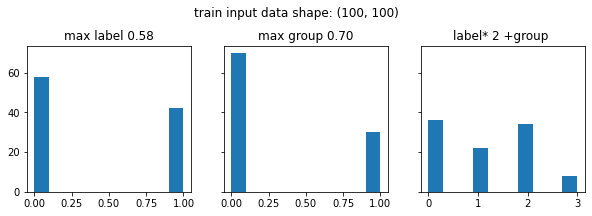

data loader 1


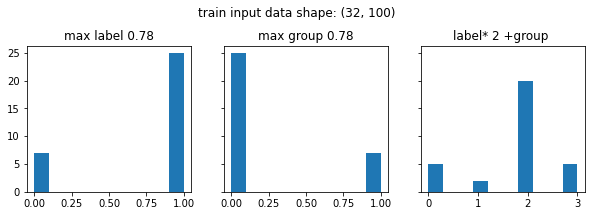

data loader 2


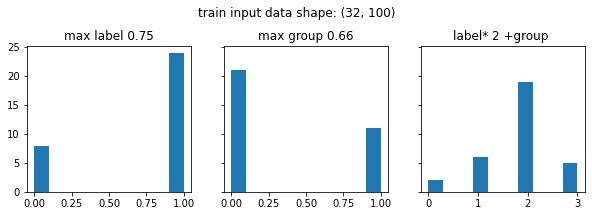

data loader 3


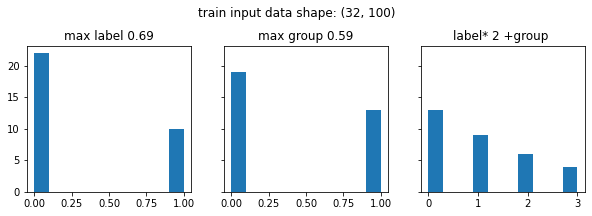

data loader 4


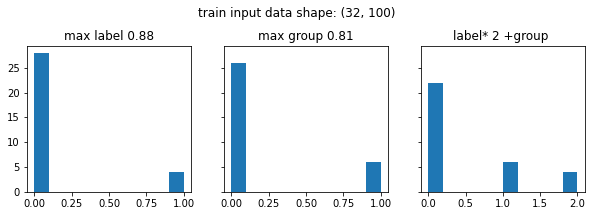

data loader 5


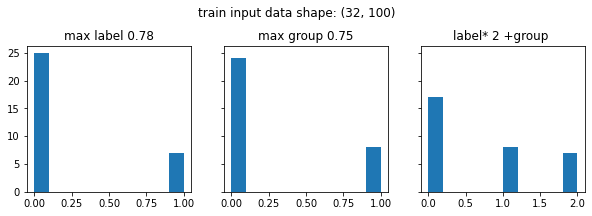

data loader 6


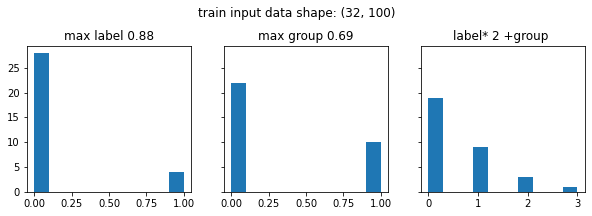

data loader 7


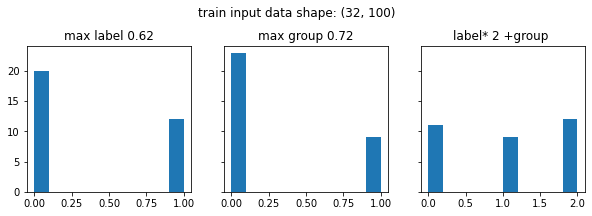

data loader 8


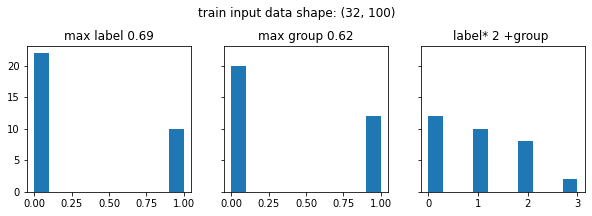

data loader 9


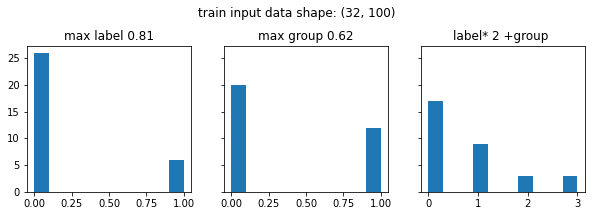

data loader 10


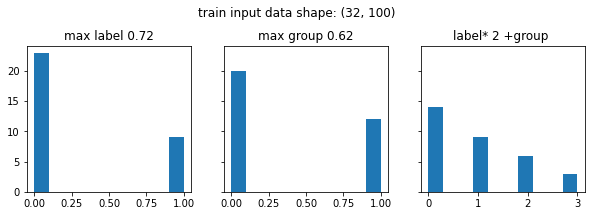

In [11]:
for i in range(len(dl_loaders)):
    print("data loader",i)
    x,y,z = dl2nparray(dl_loaders[i])
    dataset_description(x,y,z)

data cumulative loader 0


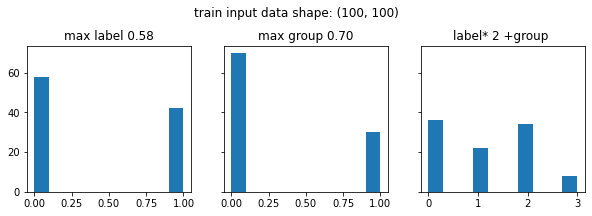

data cumulative loader 1


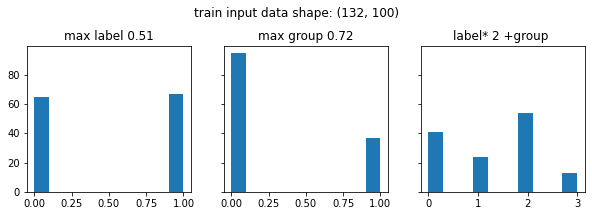

data cumulative loader 2


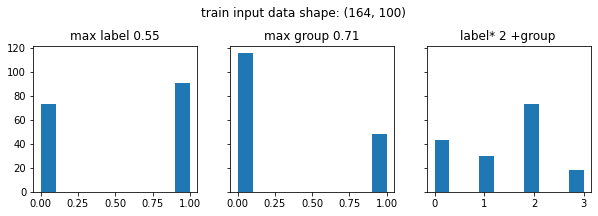

data cumulative loader 3


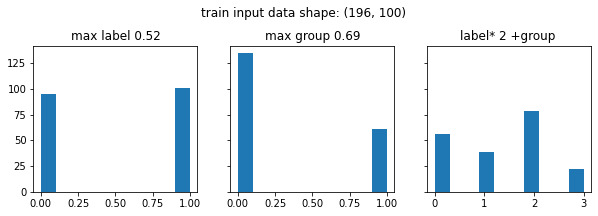

data cumulative loader 4


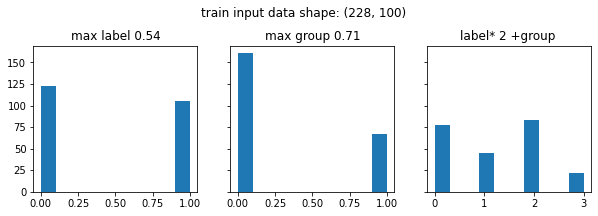

data cumulative loader 5


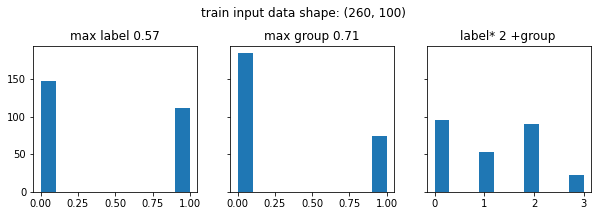

data cumulative loader 6


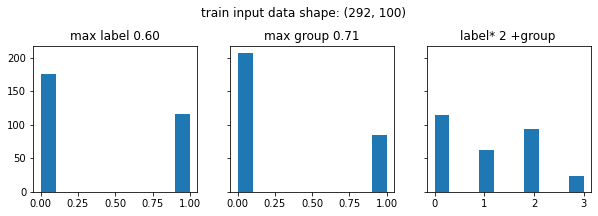

data cumulative loader 7


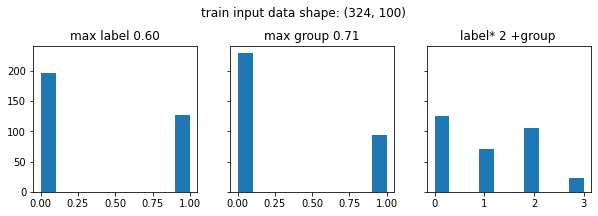

data cumulative loader 8


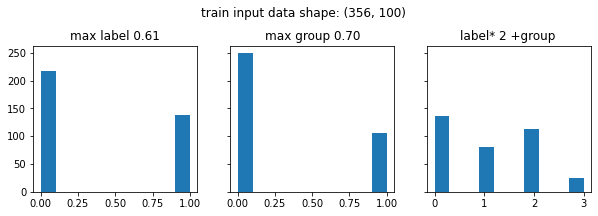

data cumulative loader 9


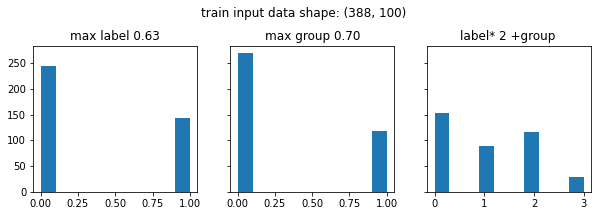

data cumulative loader 10


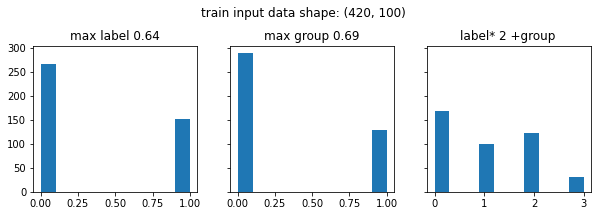

In [12]:
for i in range(len(dl_loaders)):
    print("data cumulative loader",i)
    x,y,z = dl2nparray(dl_cum_loaders[i])
    dataset_description(x,y,z)

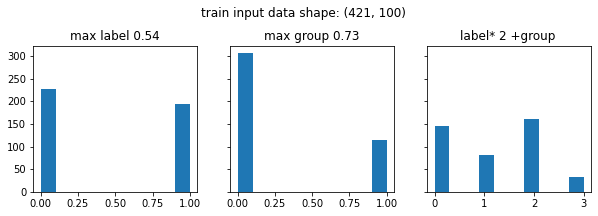

In [13]:
x,y,z = dl2nparray(test_loader)
dataset_description(x,y,z)